In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reads csv file 'coin-flips.py'
data = np.genfromtxt('coin-flips.csv', delimiter=',', filling_values=np.nan, dtype=str)

In [4]:
# Probability of picking a fair or biased coin
f = b = 0.5

# Probability of coin toss resulting in head/tail for fair/biased
tf = 0.5
hf = 0.5
hb = 0.25
tb = 0.75
prob_fair_data = []


# Prior Assumptions
# pbh = 1
# pbt = 0

In [5]:
# Find the posterior probability using Bayes's Theorem
def posterior_cal(xf, xb, f, b, li):
    e = evidence(xf, xb, f, b)
    prior = b
    prob_data = (li * prior) / e
    return prob_data

In [6]:
# Find likelihood of coin being fair for head & tail
# If head then likelihood of bias is 0.25
# If tail then likelihood of bias is 0.75

# Find evidence for the posterior i,e denominator
def evidence(xf, xb, f, b):
    evi = (xf * f) + (xb * b)
    return evi

In [7]:
# Loop for each coin flip for 12 experiments
def count(fhead, ftail, bhead, btail, fair, bias):
    for rows in range(len(data)):
        eloop = data[rows]
        for row in range(len(eloop)):
            if eloop[row] == 'H':
                likelihood = 0.25
                res = posterior_cal(bhead, fhead, fair, bias, likelihood)
                bias = res
                fair = 1 - bias
                prob_fair_data.append(fair)
            else:
                likelihood = 0.75
                res = posterior_cal(btail, ftail, fair, bias, likelihood)
                bias = res
                fair = 1 - bias
                prob_fair_data.append(fair)

    return prob_fair_data

In [8]:
counts = count(hf, tf, hb, tb, f, b)
print(counts)
rcounts = np.reshape(counts, (12, 20))

[0.6666666666666667, 0.75, 0.7272727272727273, 0.7, 0.7692307692307692, 0.75, 0.7272727272727273, 0.7857142857142857, 0.8235294117647058, 0.8125, 0.8, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7999999999999999, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7272727272727272, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7999999999999999, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7999999999999999, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7999999999999999, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7999999999999999, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7999999999999999, 0.8333333333333333, 0.8235294117647058, 0.85, 0.8421052631578947, 0.8333333333333333, 0.8235294117647058, 0.8125, 0.7999999999999999, 0.7857142857142857, 0.7692307692307692, 0.75, 0.7272727272727272, 0.7, 0.6666666666666665, 0.6249999999999998, 0.5714285714285712, 0.49999999999999967, 0.3999999999999997, 0.24999999999999944, -8.881784197001252e-16, 0.4999999999999998, 0.39999999999999

In [9]:
def plot(graph):
    for row in range(len(graph)):
        y = graph[row, :]
        x = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)
        plt.plot(x, y)
        plt.show()

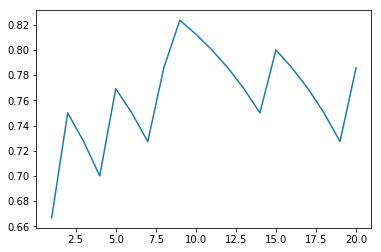

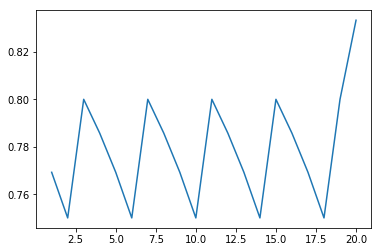

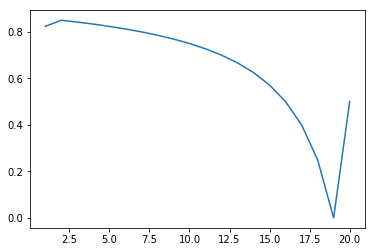

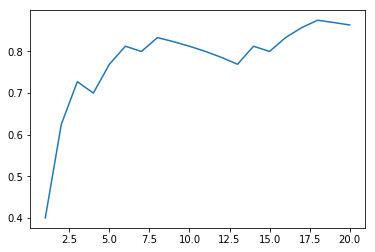

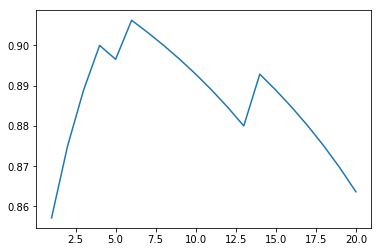

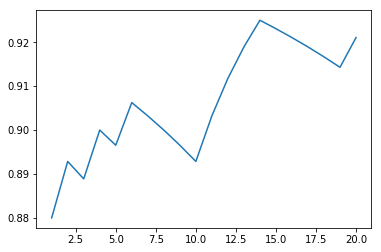

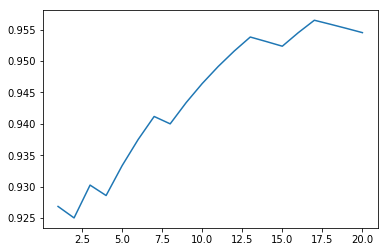

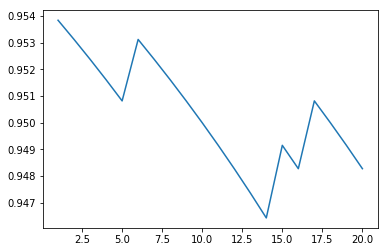

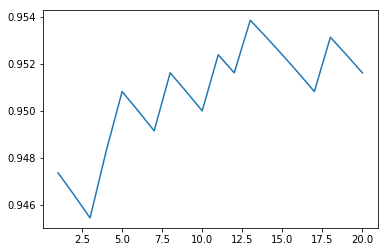

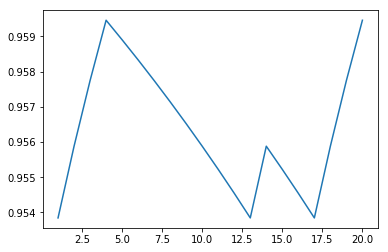

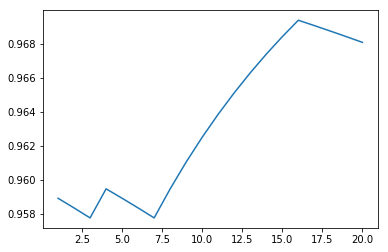

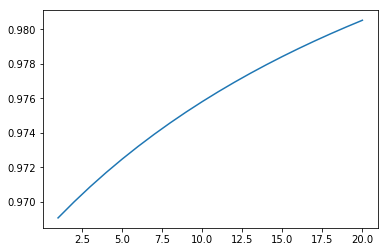

In [10]:
plot(rcounts)